## Fragility Curves
Fragility curves are located in the \input\*MyProject*\fragilityCurves directory. They are provided as CSV files with the following format:

    - The first row of the CSV file contains the column names.
    - The first column should be named “intensity” and contains the hazard intensity (e.g., wind speed in m/s).
    - The other columns should contain the probability of failure. The column names correspond to the fragility curve names and must match the names used in the network.xlsx file.
    - The probability of failure must remain within the range of 0 to 1.
    - Multiple CSV files can be provided in the same directory, allowing users to describe fragility curves with different ranges and step sizes of intensity.

You can select how each individual fragility curve is interpolated by adding a suffix to the fragility curve name (e.g., “tower_type1_step” for step interpolation). Three interpolation methods are currently supported:

    - step: A step function is used to interpolate data between each two data points.
    - linear: This is the default interpolation method. A linear regression is used to interpolate data between each two data points.
    - polynomial: A polynomial interpolation is used.

Alternativly it is possible to modify the interpolation method by setting the FragilityCurve.interpolateMethod attribute to one of the three available methods ("step", "linear" or "polynomial").

the FragilityCurve.plot_fc(x) can plot both the provided data points and the interpolated data for a new array "x" for a specific fragility curve.
The created fragility curves are stored in netwrok.fragilityCurves.

Network for study case <1-HV-urban--0-sw> initialized.


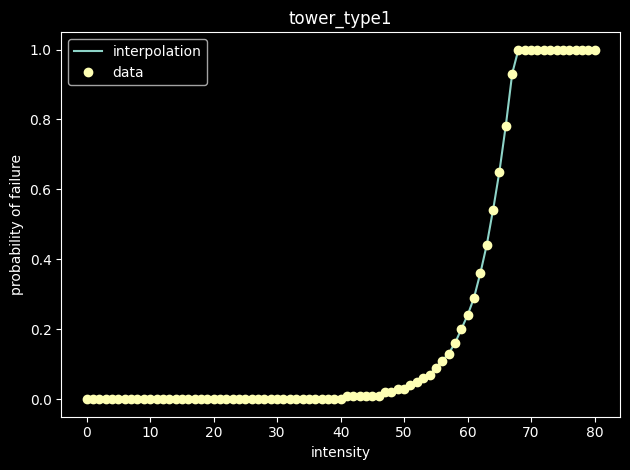

In [5]:
import reXplan as rx
import numpy as np

rx.config.path.SetWorkspaceFolder('Examples')
network = rx.network.Network('1-HV-urban--0-sw')

xnew = np.linspace(0, 80, num=1000, endpoint=True)
fig, ax = network.fragilityCurves['tower_type1'].plot_fc(xnew)

reXplan.fragilitycurve.plotFragilityCurves(fragilityCurves, x) can plot multiple fragility curves in one diagram.

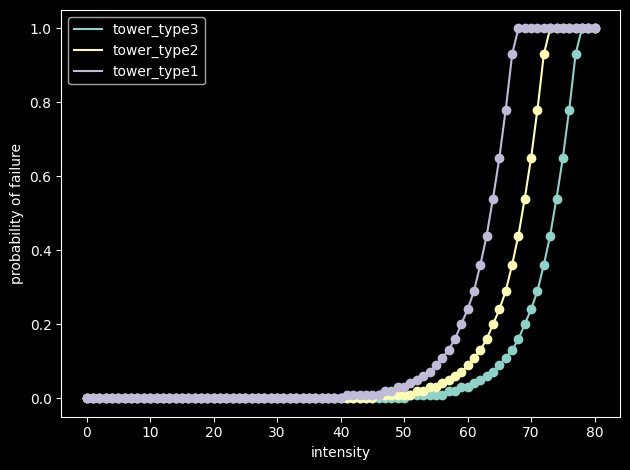

In [7]:
fig, ax = rx.fragilitycurve.plotFragilityCurves(network.fragilityCurves, xnew)

Using different interpolation methods

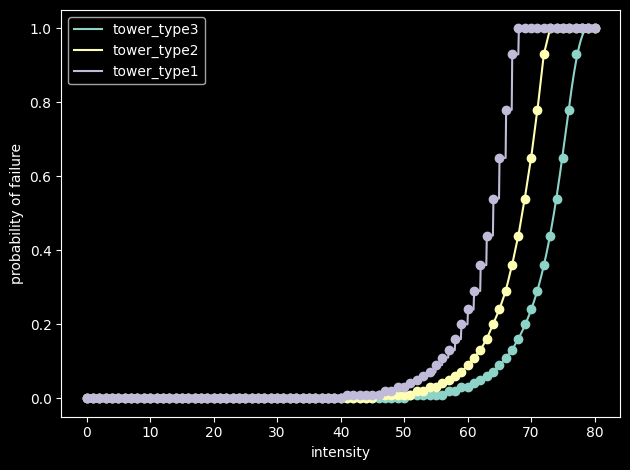

In [9]:
network.fragilityCurves['tower_type1'].interpolateMethod = 'step'
network.fragilityCurves['tower_type2'].interpolateMethod = 'linear'
network.fragilityCurves['tower_type3'].interpolateMethod = 'polynomial'
fig, ax = rx.fragilitycurve.plotFragilityCurves(network.fragilityCurves, xnew)